# Loans Dataset

## DataFrame Information

#### Loading the Data / Quick Overview

This is to be able to clearly and quickly distinguish how many values we have and how many columns there are in the data set right from the onset.

In [1]:
import pandas as pd
import numpy as np
loans_df = pd.read_csv("loan_payments_data.csv") 
# Displays all the columns in the Data set 
display_columns = pd.set_option('display.max_columns', None)

loans = loans_df.head(10)
print("Top 10 values from each column in data set: ")
print(loans)
#Displays a total count of rows and columns 
print ("Count of Rows and Columns: ")
print(loans_df.shape)

Top 10 values from each column in data set: 
         id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   
5  38656111   41439917         2525         2525.0             2525.0   
6  38656110   41439916         6675         6675.0             6675.0   
7  38656067   41439872        26500        26500.0            26200.0   
8  38656063   41439868        10000        10000.0            10000.0   
9  38656052   41439857        10000            NaN            10000.0   

        term  int_rate  instalment grade sub_grade employment_length  \
0  36 months      7.49      248.82     A        A4           5 years   
1  36 m

##### Statistical Values 
A brief overview of the mean median and mode and other statistical functions to give insight to the symmetry distribution, value range and general data distribution

In [2]:
from db_utils import DataFrameInfo
info = DataFrameInfo
#Displays Statistical values, Column Data Types and Unique values
print("\nStatistical Values:")
print(loans_df.describe().round(3))





             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment grade sub_grade employment_length  \

#### Distinct Values
This helps us take a closer look at the data set, a dataset with less distinct values can either be full of repetition and require cleaning or could be a categorical column.


In [3]:
print("  Total distinct values in each column     ")
for col in loans_df.columns:
    distinct_counts = loans_df[col].nunique()
    print (f" Total distinct values in '{col}': {distinct_counts}")
    print("-----------------------------")
    categorical_columns = [col for col in loans_df.columns if loans_df[col].nunique() < 20]
if distinct_counts < 20:
    categorical_columns.append(col) 
print ("categorical_columns:")
print(categorical_columns)

  Total distinct values in each column     
 Total distinct values in 'id': 54231
-----------------------------


 Total distinct values in 'member_id': 54231
-----------------------------
 Total distinct values in 'loan_amount': 1083
-----------------------------
 Total distinct values in 'funded_amount': 1122
-----------------------------
 Total distinct values in 'funded_amount_inv': 5261
-----------------------------
 Total distinct values in 'term': 2
-----------------------------
 Total distinct values in 'int_rate': 457
-----------------------------
 Total distinct values in 'instalment': 19940
-----------------------------
 Total distinct values in 'grade': 7
-----------------------------
 Total distinct values in 'sub_grade': 35
-----------------------------
 Total distinct values in 'employment_length': 11
-----------------------------
 Total distinct values in 'home_ownership': 5
-----------------------------
 Total distinct values in 'annual_inc': 6132
-----------------------------
 Total distinct values in 'verification_status': 3
-----------------------------
 Total distinct values i

We can conclude some of these columns will contain categorical data as there is such a few number of unique values

In [4]:
#List of Numerical Columns
numeric_cols = loans_df.select_dtypes(include=['float64', 'int64'])
num_cols = [column for column in loans_df.columns if loans_df[column].dtypes in ['int64', 'float64']] 

print('Number of Numerical Columns: ', len (num_cols))
print("Numerical Columns:")
print(numeric_cols.columns.tolist())

Number of Numerical Columns:  28
Numerical Columns:
['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code']


This sets out which columns are numerical as when transforming the data set it is only the numerical columns that will provide usable data.

Nulls Checker 

In [5]:
from db_utils import NullPercentageCalculator
calculator = NullPercentageCalculator
nulls_check = calculator.count_null_values(loans_df)
print(nulls_check)

id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp                          0
o

Data Types

Knowing the distinct types of data we have in the dataset will be essential later on when transforming the data 

In [6]:
print("Column Data Types:")
print(loans_df.dtypes)

Column Data Types:
id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_

Checking the Dataset to see if they are any datetime columns as from the data set can see there are columns involving dates so will need to be cleaned effectively.

In [7]:
year_columns_count = [column for column in loans_df.columns if loans_df[column].dtypes in ['datetime64']]
print('Year Columns Count: '), len(year_columns_count)

Year Columns Count: 


(None, 0)

As you can see, there 0 columns with the datetime type however in the dataset we can see that we have dates mentioned so this will need to be transformed.

In [8]:

from db_utils import NullPercentageCalculator
calculator = NullPercentageCalculator
columns = calculator.list_columns(loans_df)
print("List of all the columns")
print (columns)





List of all the columns
['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type']


##### Nulls 

Initial Null Count: 
id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp        

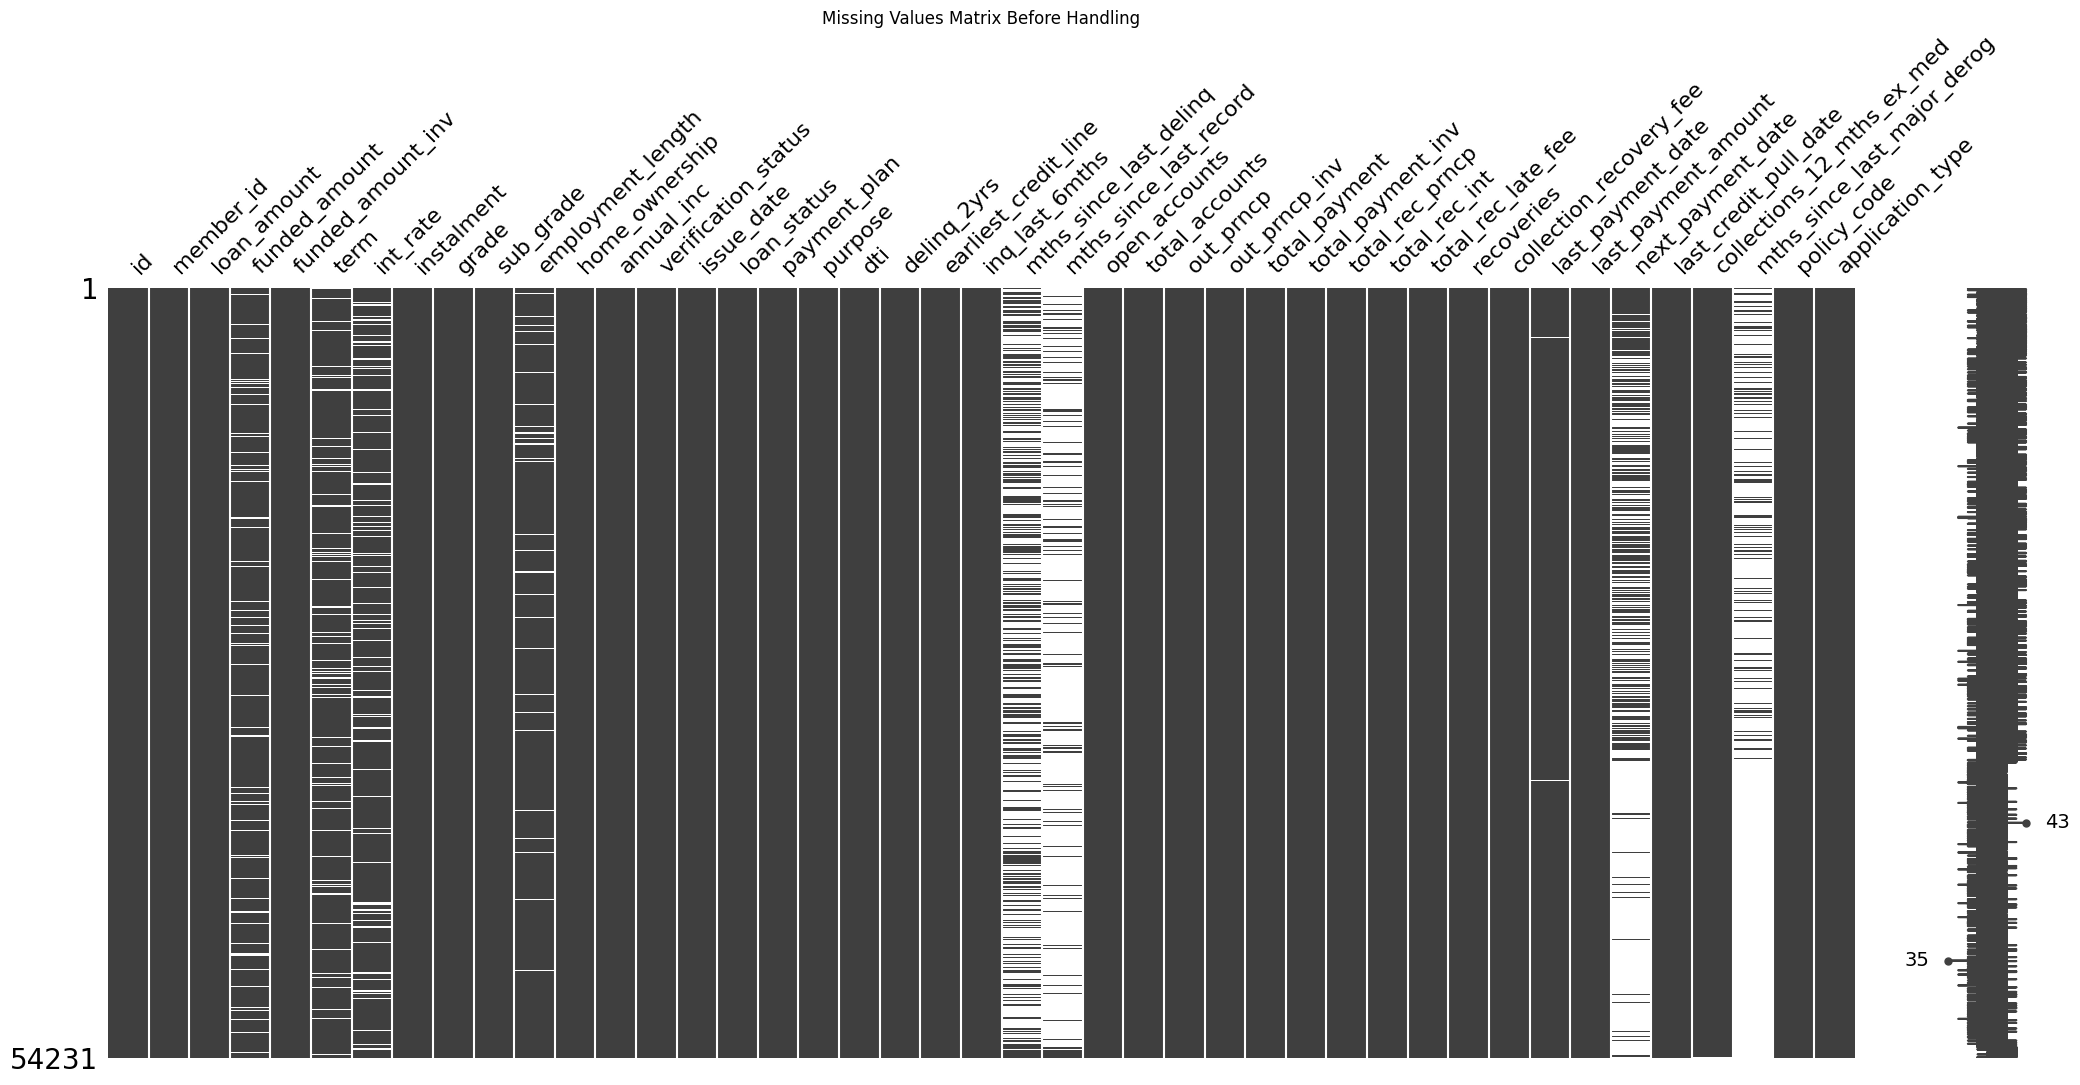

In [9]:
from db_utils import Plotter
print("Initial Null Count: ")
initial_null = calculator.count_null_values(loans_df)
print(initial_null)
null_percentage = calculator.calculate_null_percentage(loans_df, columns)
print("------------------------------------------------------------------------------------------")
print("Initial Null Percentages:\n", null_percentage)

plotter = Plotter
plotter.show_matrix_before(loans_df)


This matrix visualisation shows the presence / abscence of null values in each of the columns.
It also shows the 4 columns which had the most nulls and were then dropped.

In [10]:
print("Dropped Columns with High Nulls (>50%): ")
high_null = calculator.drop_high_null_columns(loans_df)
print(high_null)

Dropped Columns with High Nulls (>50%): 
(             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  insta

As there is a significant amount of nulls (>50%), I am going to drop these rows completely from the data set as it could potentially make the data less reliable. For the rest of the columns with nulls we are going to impute the nulls. Columns dropped were as follows: ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']

Columns updated with imputed nulls: 


             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment grade sub_grade employment_length  \

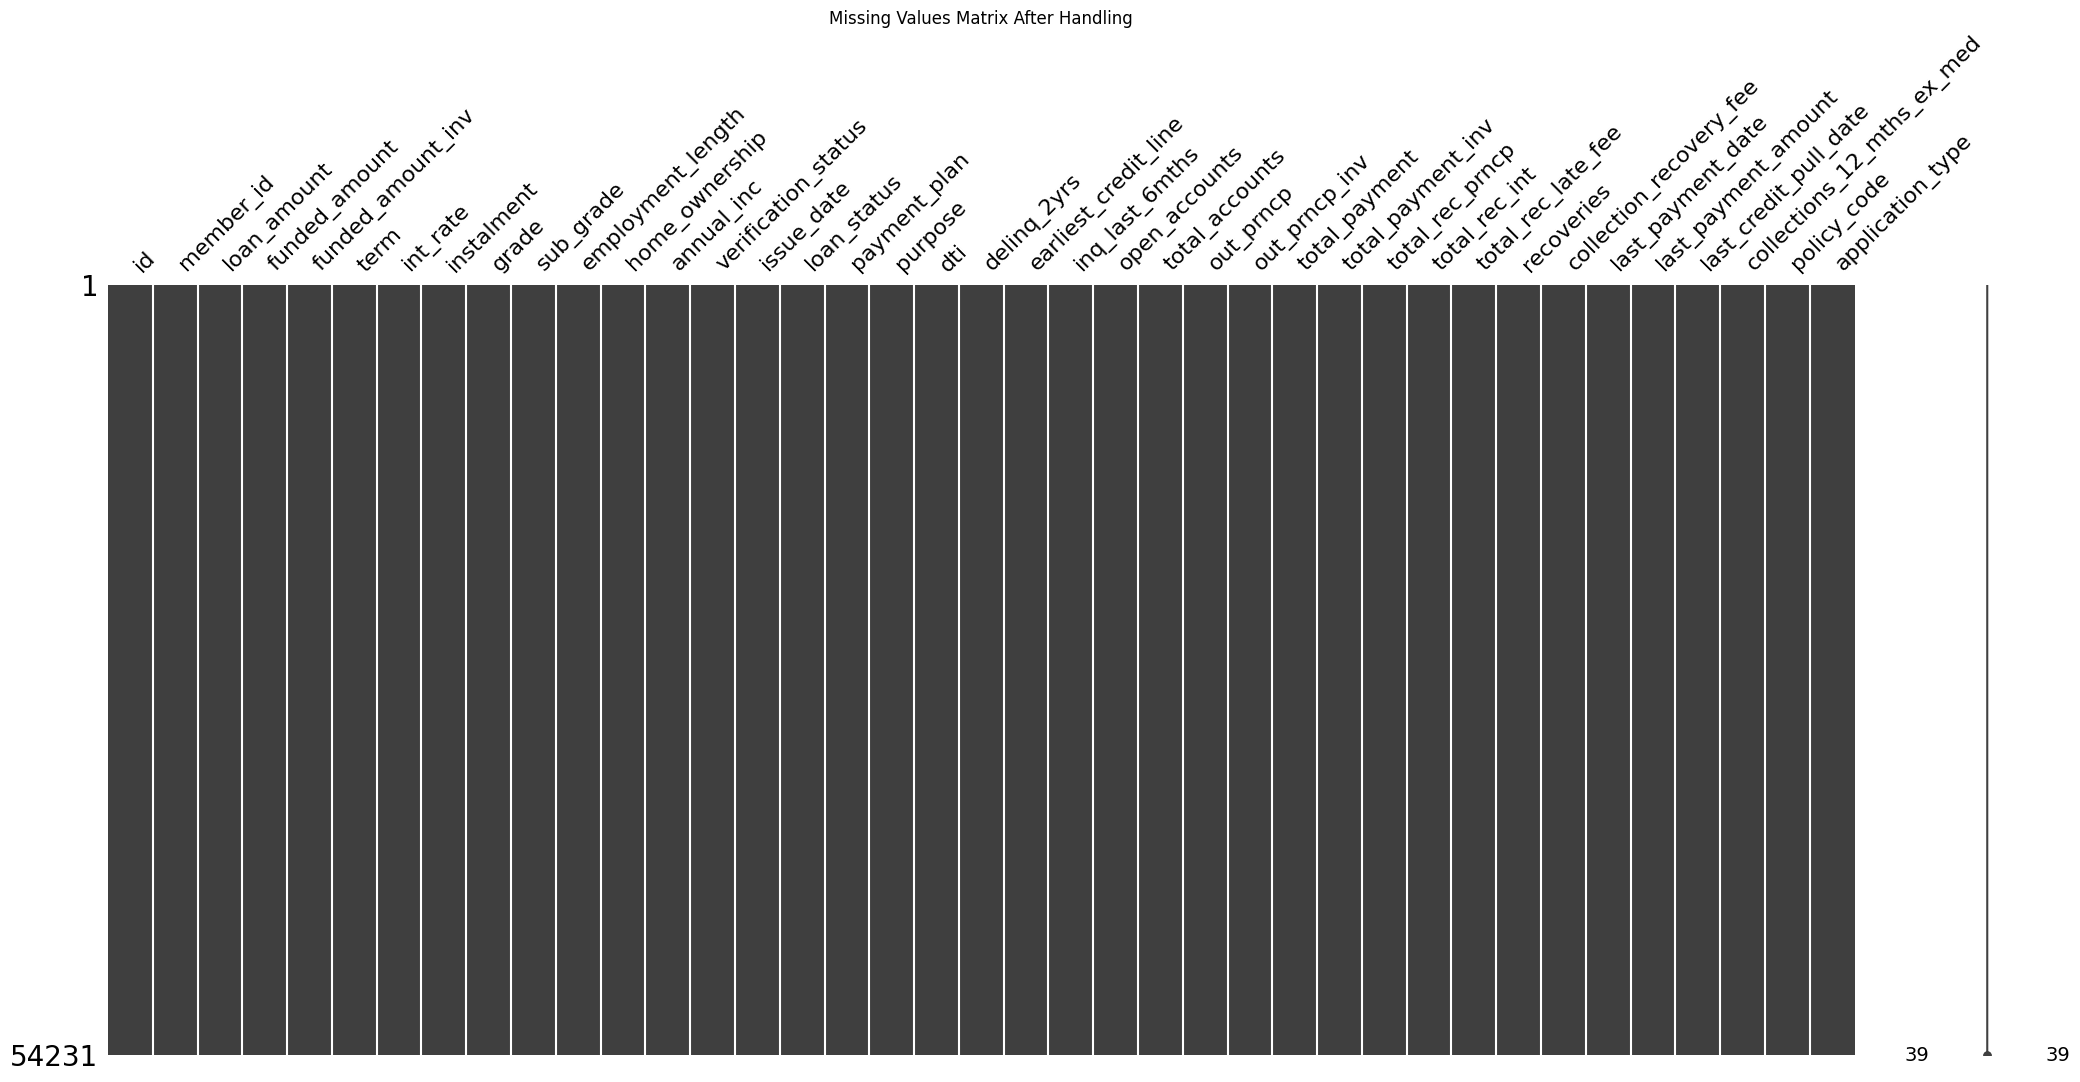

In [11]:
print("Columns updated with imputed nulls: ")
imputed_nulls = calculator.impute_nulls(loans_df)
print(imputed_nulls)
print("Null count following imputing: ")
imputed_nulls_count = loans_df.isnull().sum()
print(imputed_nulls_count)

plotter.show_matrix_after(loans_df)

This matrix visulisation shows the same plot following imputing the null values and dropping the column with high nulls and shows that all null values have been removed and the nulll count is 0.

In [12]:
from db_utils import DataFrameTransform
transformations = DataFrameTransform
loans_df
skewed_columns = ['id', 'member_id', 'loan_amount', 'funded_amount_inv', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record','open_accounts', 'total_accounts','collections_12_ex_med','mths_since','last_major_derog','policy_code', 'int_rate', 'instalment','dti', 'out_prncp', 'total_payment_inv,total_rec_prncp','total_rec_int','total_rec_late_fees','recoveries','collection_recovery_fee' ,'last_payment_amount']
date_columns =  ['issue_date', 'earliest_credit_line','last_payment_date',"last_credit_pull_date"]
categorical_columns = ['grade', 'sub_grade', 'loan_status', 'payment_plan', 'purpose', 'application_type']
datetime_cols = [(date_columns)]

loans_df._convert_to_datetime(date_columns)
loans_df.drop_rows_date_columns(loans_df)
loans_df._extract_numeric_and_convert('employment_length', r'(\d+)')
loans_df._extract_numeric_and_convert('term', r'(\d+)')
loans_df._convert_to_categorical(categorical_columns)
loans_df._handle_missing_and_convert_to_int(['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog'])
loans_transform = transformations.transform_data()

AttributeError: 'DataFrame' object has no attribute '_convert_to_datetime'

In [ ]:
from db_utils import DataFrameTransform

null_graph = DataFrameTransform(loans_df)
null_graph._extract_numeric_and_convert()



## Data Cleaning

In [ ]:
from db_utils import Plotter 
plotter = Plotter
plotter.show_matrix_before(loans_df)




    
    




In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Selecting only columns with float or integer data types
columns_of_interest = numeric_cols 

# Plotting histograms for selected columns using pandas' .hist() function
orig_plot = loans_df.hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()  # Improves spacing between subplots
plt.show()


In [ ]:
from data_cleaning_utils import handle_missing_values
from data_cleaning_utils import visualize_null_removal
loans_df_cleaned = handle_missing_values(loans_df)
# Create a copy of loans_df_cleaned for use in visualize_null_removal function
cleaned_loans_df_copy1 = loans_df_cleaned.copy()
visualize_null_removal(loans_df, cleaned_loans_data)


In [ ]:
import matplotlib.pyplot as plt
columns_of_interest = numeric_cols
new_plot = loans_df.hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black', kde=True)
plt.tight_layout()  # Improves spacing between subplots
plt.show()



In [ ]:
from db_utils import Plotter
mv_visuals = Plotter(loans_df)

matrix_before = mv_visuals.show_matrix_before()

mv_visuals.show_heatmap_before()
